In [1]:
import os
import numpy as np

import plotting_utils
import matplotlib.pyplot as plt
import seaborn as sns

plotting_utils.setup_plotting_params()

In [2]:
vanilla_cola = [0.610,0.081,0.151,0.405,0.177,0.119,0.155,0.138,0.168,0.168]
updated_cola = [0.575,0.177,0.132,0.399,0.209,0.149,0.210,0.199,0.145,0.164]
manual_cola = [0.531,0.305,0.211,0.476,0.393,0.214,0.356,0.406,0.388,0.395]

vanilla_mnli = [0.853,0.636,0.744,0.778,0.635,0.626,0.637,0.685,0.630,0.671]
updated_mnli = [0.850,0.666,0.740,0.783,0.660,0.648,0.656,0.691,0.658,0.691]
manual_mnli = [0.868,0.825,0.830,0.853,0.828,0.811,0.825,0.848,0.827,0.833]

vanilla_mrpc = [0.892,0.819,0.838,0.887,0.821,0.792,0.819,0.841,0.824,0.858]
updated_mrpc = [0.885,0.848,0.828,0.880,0.824,0.826,0.826,0.860,0.828,0.846]
manual_mrpc = [0.875,0.882,0.804,0.870,0.875,0.877,0.865,0.850,0.853,0.887]

vanilla_qnli = [0.923,0.821,0.850,0.883,0.815,0.793,0.810,0.822,0.812,0.837]
updated_qnli = [0.917,0.825,0.847,0.880,0.823,0.809,0.813,0.826,0.820,0.835]
manual_qnli = [0.918,0.892,0.892,0.910,0.899,0.884,0.890,0.902,0.900,0.899]

vanilla_qqp = [0.901,0.771,0.838,0.848,0.761,0.751,0.763,0.780,0.756,0.788]
updated_qqp = [0.893,0.766,0.858,0.858,0.756,0.746,0.762,0.813,0.755,0.796]
manual_qqp = [0.916,0.899,0.906,0.909,0.899,0.888,0.900,0.908,0.900,0.902]

vanilla_rte = [0.805,0.650,0.668,0.708,0.628,0.592,0.596,0.728,0.610,0.603]
updated_rte = [0.816,0.603,0.614,0.700,0.599,0.650,0.585,0.736,0.610,0.617]
manual_rte = [0.747,0.675,0.711,0.708,0.718,0.657,0.711,0.717,0.679,0.671]

vanilla_sst2 = [0.935,0.873,0.881,0.912,0.881,0.873,0.886,0.847,0.872,0.878]
updated_sst2 = [0.935,0.870,0.878,0.923,0.878,0.868,0.887,0.847,0.873,0.882]
manual_sst2 = [0.933,0.908,0.881,0.924,0.915,0.903,0.904,0.905,0.903,0.911]

vanilla_stsb = [0.895,0.663,0.869,0.844,0.657,0.632,0.673,0.786,0.667,0.740]
updated_stsb = [0.901,0.688,0.869,0.850,0.705,0.682,0.705,0.807,0.704,0.762]
manual_stsb = [0.890,0.822,0.880,0.874,0.807,0.809,0.818,0.858,0.833,0.852]

vanilla_wnli = [0.437,0.479,0.408,0.352,0.423,0.380,0.338,0.408,0.437,0.408]
updated_wnli = [0.507,0.437,0.437,0.394,0.380,0.394,0.521,0.437,0.549,0.408]
manual_wnli = [0.197,0.225,0.183,0.239,0.239,0.225,0.254,0.211,0.225,0.268]

vanilla_all = [vanilla_cola, vanilla_mnli, vanilla_mrpc, vanilla_qnli, vanilla_qqp, vanilla_rte, vanilla_sst2, vanilla_stsb, vanilla_wnli]
updated_all = [updated_cola, updated_mnli, updated_mrpc, updated_qnli, updated_qqp, updated_rte, updated_sst2, updated_stsb, updated_wnli]
manual_all = [manual_cola, manual_mnli, manual_mrpc, manual_qnli, manual_qqp, manual_rte, manual_sst2, manual_stsb, manual_wnli]

task_names = ["COLA", "MNLI", "MRPC", "QNLI", "QQP", "RTE", "SST2", "STSB", "WNLI"]

perturbation_names = ['char_delete','word_order','char_lettercase','char_replace',
                      'typos','char_swap','char_misspelled','char_insert','char_repetition']
perturbations=['Vanilla'] + [f'P{i+1}' for i in range(len(perturbation_names))]

In [3]:
def my_bar_plot(plot_title, before_update, auto_update, manual_update, output_dir=None):
    width = 0.3
    ind = np.arange(len(before_update))
    # Plotting
    plt.figure(figsize=(12,5))
    plt.bar(ind*2, before_update , width, label='Before')
    plt.bar(ind*2 + width, auto_update, width, label='MGit')
    plt.bar(ind*2 + 2*width, manual_update, width, label='Manual')
    plt.xticks(ind*2 + width , perturbations)
    all_data = list(before_update) + list(auto_update) + list(manual_update)
    plt.ylim([np.min(all_data)-np.std(all_data)/4,np.max(all_data)+np.std(all_data)])
    plt.legend(frameon=False, ncol=2,)
    plt.ylabel("Accuracy")
    sns.despine()
    
    if output_dir is not None:
        output_filename = os.path.join(output_dir, plot_title + ".pdf")
        plt.savefig(output_filename, bbox_inches='tight')
    
    plt.show()

In [4]:
def scatterplot(before_update_all, auto_update_all, manual_update_all, output_filename=None):
    plt.figure(figsize=(10,5))
    num_total = 0
    num_better_than_zero = 0
    for i, (before_update, auto_update, manual_update) in enumerate(
        zip(before_update_all, auto_update_all, manual_update_all)):
        auto_differences = [(x2 - x1) * 100.0 for (x1, x2) in zip(before_update, auto_update)]
        num_total += len(auto_differences)
        num_better_than_zero += len([x for x in auto_differences if x >= 0])
        plt.scatter([i for _ in range(len(auto_differences))], auto_differences)
        manual_differences = [(x2 - x1) * 100.0 for (x1, x2) in zip(before_update, manual_update)]

    print(f"Tasks with improvement: {num_better_than_zero} / {num_total}")
    plt.axhline(y=0.0, color='k', linestyle=':')
    plt.xticks(range(len(before_update_all)), task_names, rotation=20)
    plt.ylim([-20, 20])
    plt.legend(frameon=False, ncol=2)
    plt.ylabel("Accuracy difference (%)")
    sns.despine()
    
    if output_filename is not None:
        plt.savefig(output_filename, bbox_inches='tight')
    
    plt.show()

No handles with labels found to put in legend.


Tasks with improvement: 58 / 90


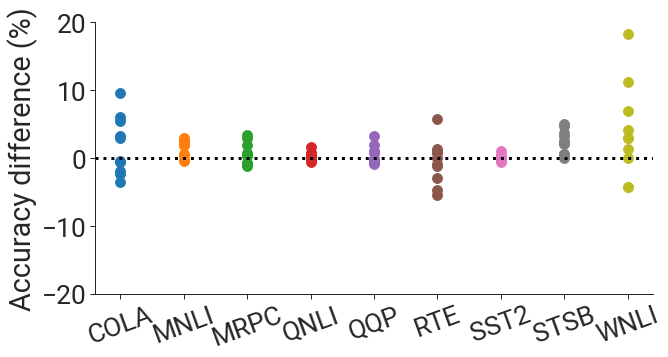

In [5]:
scatterplot(before_update_all=vanilla_all,
            auto_update_all=updated_all,
            manual_update_all=manual_all,
            output_filename="figures/g5_update/all.pdf")

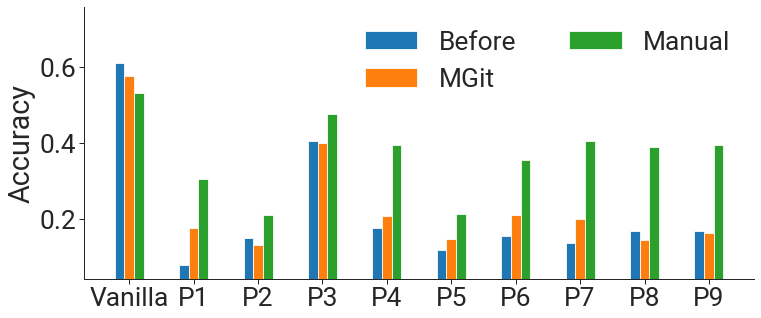

In [6]:
my_bar_plot(plot_title='cola',before_update=vanilla_cola,auto_update=updated_cola,manual_update=manual_cola,
            output_dir="figures/g5_update")

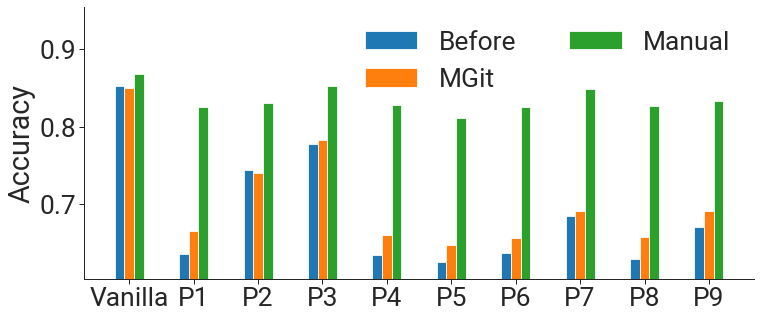

In [7]:
my_bar_plot(plot_title='mnli',before_update=vanilla_mnli,auto_update=updated_mnli,manual_update=manual_mnli,
            output_dir="figures/g5_update")

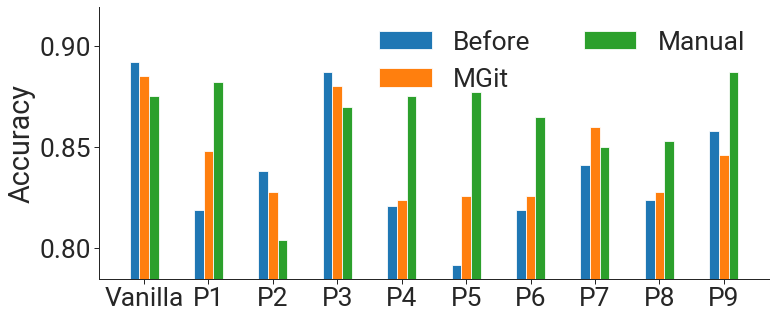

In [8]:
my_bar_plot(plot_title='mrpc',before_update=vanilla_mrpc,auto_update=updated_mrpc,manual_update=manual_mrpc,
            output_dir="figures/g5_update")

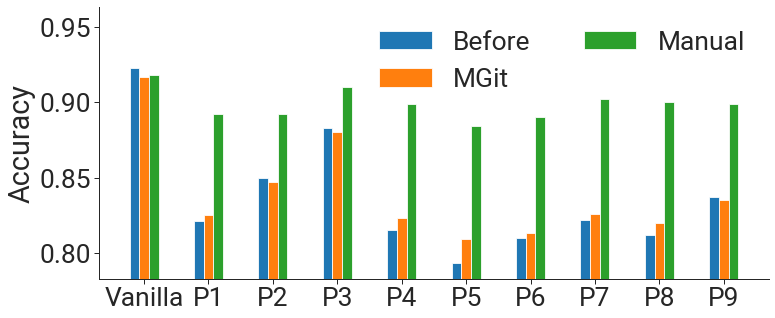

In [9]:
my_bar_plot(plot_title='qnli',before_update=vanilla_qnli,auto_update=updated_qnli,manual_update=manual_qnli,
            output_dir="figures/g5_update")

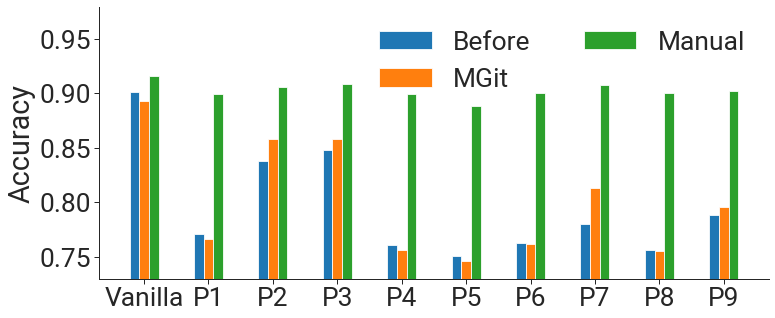

In [10]:
my_bar_plot(plot_title='qqp',before_update=vanilla_qqp,auto_update=updated_qqp,manual_update=manual_qqp,
            output_dir="figures/g5_update")

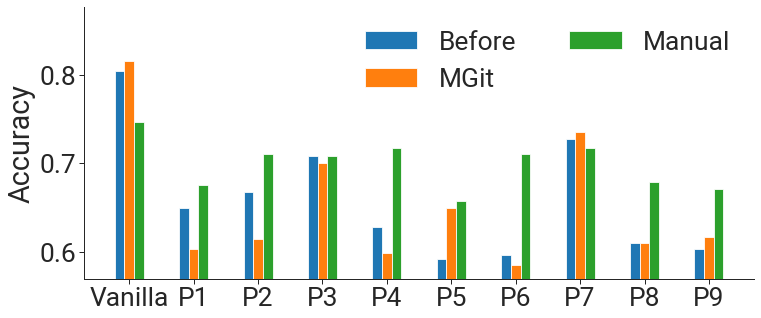

In [11]:
my_bar_plot(plot_title='rte',before_update=vanilla_rte,auto_update=updated_rte,manual_update=manual_rte,
            output_dir="figures/g5_update")

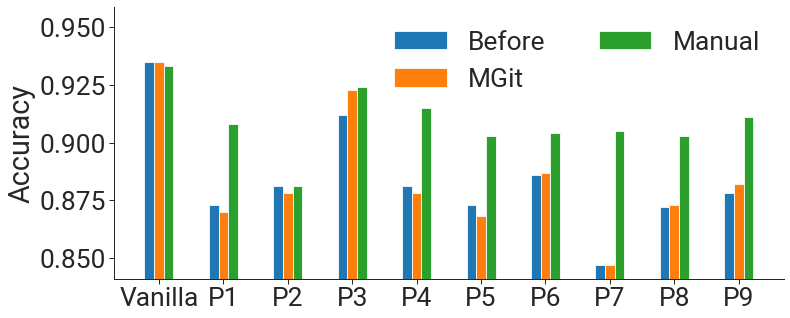

In [12]:
my_bar_plot(plot_title='sst2',before_update=vanilla_sst2,auto_update=updated_sst2,manual_update=manual_sst2,
            output_dir="figures/g5_update")

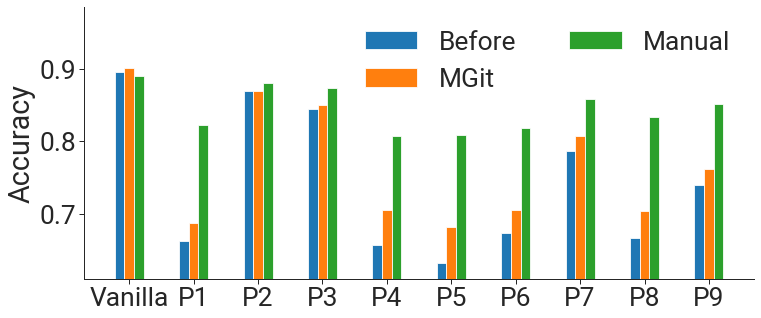

In [13]:
my_bar_plot(plot_title='stsb',before_update=vanilla_stsb,auto_update=updated_stsb,manual_update=manual_stsb,
            output_dir="figures/g5_update")

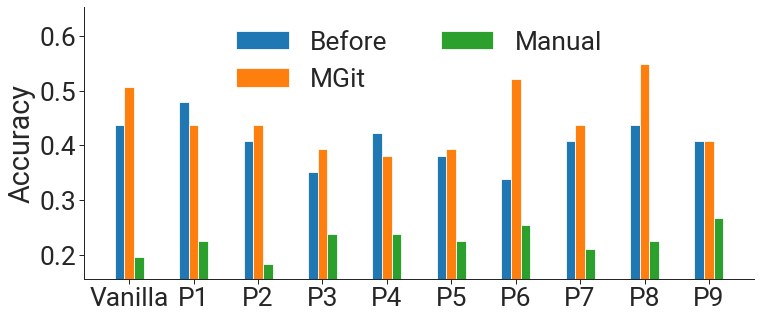

In [14]:
my_bar_plot(plot_title='wnli',before_update=vanilla_wnli,auto_update=updated_wnli,manual_update=manual_wnli,
            output_dir="figures/g5_update")